## Step 1: download the Flight data from 2008

+ We're interested in predicting Departure Delays!

http://stat-computing.org/dataexpo/2009/the-data.html

In [2]:
import pandas as pd

df = pd.read_csv("/Users/Carter/Projects/DataScience/DS-SF-32/lessons/lesson-7/2008.csv").fillna("unk")

In [9]:


df2 = df.loc[df['DepDelay']!='unk'].head(10000)

In [10]:
df2.shape

(10000, 29)

In [11]:
pd.options.display.max_columns = 999

df2.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003,1955,2211,2225,WN,335,N712SW,128,150,116,-14,8,IAD,TPA,810,4,8,0,unk,0,unk,unk,unk,unk,unk
1,2008,1,3,4,754,735,1002,1000,WN,3231,N772SW,128,145,113,2,19,IAD,TPA,810,5,10,0,unk,0,unk,unk,unk,unk,unk
2,2008,1,3,4,628,620,804,750,WN,448,N428WN,96,90,76,14,8,IND,BWI,515,3,17,0,unk,0,unk,unk,unk,unk,unk
3,2008,1,3,4,926,930,1054,1100,WN,1746,N612SW,88,90,78,-6,-4,IND,BWI,515,3,7,0,unk,0,unk,unk,unk,unk,unk
4,2008,1,3,4,1829,1755,1959,1925,WN,3920,N464WN,90,90,77,34,34,IND,BWI,515,3,10,0,unk,0,2,0,0,0,32


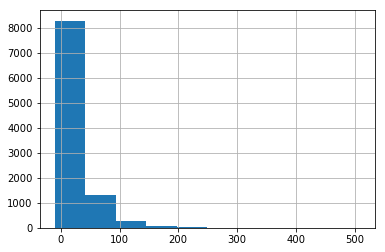

In [13]:
%matplotlib inline


df2['DepDelay'].hist()

In [18]:
print df2.loc[df2['DepDelay']>10].shape
print df2.loc[df2['DepDelay']<=10].shape



(4681, 29)
(5319, 29)


In [23]:
df2.loc[:, 'LaterThan10']=0

df2.loc[df2['DepDelay']>10, 'LaterThan10'] 

1        0
4        0
5        0
6        0
11       0
16       0
18       0
19       0
21       0
22       0
25       0
26       0
27       0
30       0
33       0
34       0
35       0
37       0
38       0
39       0
40       0
41       0
44       0
45       0
48       0
49       0
52       0
53       0
56       0
57       0
        ..
10047    0
10054    0
10058    0
10059    0
10061    0
10071    0
10075    0
10079    0
10082    0
10083    0
10085    0
10086    0
10087    0
10088    0
10092    0
10095    0
10100    0
10109    0
10113    0
10114    0
10115    0
10118    0
10124    0
10133    0
10136    0
10138    0
10139    0
10154    0
10155    0
10156    0
Name: LaterThan10, dtype: int64

### This dataset is WAY TOO BIG for the get_dummies function

+ Feel free to test it out and eventually use the "interrupt" function when you get bored
+ Hey maybe it still works? Who knows. It took a while for me. 

In [ ]:
##pd.get_dummies(df[['TailNum', 'Origin', 'Dest']])

### Let's first investigate the String Vars here

In [ ]:
df2[['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode']].head(10)

In [ ]:
df2['CancellationCode'].value_counts()

## We can use the Label Encoder to map the Strings to numbers!

+ THESE ARE NOT DUMMY VARIABLES
+ Note the fit vs fit_transform function

In [ ]:
from sklearn.preprocessing import  LabelEncoder

le = LabelEncoder()

le.fit(df2['TailNum'])

le.transform(df2['TailNum'])



### Alternative: sklearn.preprocessing.LabelBinarizer

In [ ]:
df2['TailNum'] = df2['TailNum'].apply(str)

In [ ]:
from sklearn.preprocessing import LabelBinarizer


lb = LabelBinarizer()

lb.fit(df2['TailNum'])

lb.transform(df2['TailNum']
             


### TASK: How can you transform all character variables into numbers? 

+ Take 10 minutes to work with your partner

In [ ]:
#df2.loc[:, ['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode']] = df2[['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode']].apply(lambda x: le.fit_transform(x), axis=0)


## Alternative

In [24]:
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer


lb = MultiLabelBinarizer()

testX = lb.fit_transform(df2[['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode']].as_matrix())

In [26]:
testX

array([[0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1],
       ..., 
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1]])

In [28]:
pd.DataFrame(data=testX, columns=lb.classes_)

,ABQ,ALB,AMA,AUS,BDL,BHM,BNA,BOI,BUF,BUR,BWI,CLE,CMH,CRP,DAL,DEN,DTW,ELP,FLL,GEG,HOU,HRL,IAD,IND,ISP,JAN,JAX,LAS,LAX,LBB,LIT,MAF,MCI,MCO,MDW,MHT,MSY,N200WN,N201LV,N202WN,N203WN,N204WN,N205WN,N206WN,N207WN,N208WN,N209WN,N210WN,N211WN,N212WN,N213WN,N214WN,N215WN,N216WR,N217JC,N218WN,N219WN,N220WN,N221WN,N222WN,N223WN,N224WN,N225WN,N226WN,N227WN,N228WN,N229WN,N230WN,N231WN,N232WN,N233LV,N234WN,N235WN,N236WN,N237WN,N238WN,N239WN,N240WN,N241WN,N242WN,N243WN,N244WN,N245WN,N246LV,N247WN,N248WN,N249WN,N250WN,N251WN,N252WN,N253WN,N254WN,N255WN,N256WN,N257WN,N258WN,N259WN,N260WN,N261WN,N262WN,N263WN,N264LV,N265WN,N266WN,N267WN,N268WN,N269WN,N270WN,N271WN,N272WN,N273WN,N274WN,N275WN,N276WN,N277WN,N278WN,N279WN,N280WN,N281WN,N282WN,N283WN,N284WN,N285WN,N286WN,N287WN,N288WN,N289CT,N290WN,N291WN,N292WN,N293,N294WN,N295WN,N296WN,N297WN,N298WN,N299WN,N301SW,N302SW,N304SW,N305SW,N306SW,N307SW,N308SA,N309SW,N310SW,N311SW,N312SW,N313SW,N314SW,N315SW,N318SW,N320SW,N321SW,N323SW,N324SW,N325SW,N326SW,N327SW,N328SW,N329SW,N330SW,N331SW,N332SW,N333SW,N334SW,N335SW,N336SW,N337SW,N338SW,N339SW,N340LV,N341SW,N342SW,N343SW,N344SW,N345SA,N346SW,N347SW,N348SW,N349SW,N350SW,N351SW,N352SW,N353SW,N354SW,N355SW,N356SW,N357SW,N358SW,N359SW,N360SW,N361SW,N362SW,N363SW,N364SW,N365SW,N366SW,N367SW,N368SW,N369SW,N370SW,N371SW,N374SW,N376SW,N378SW,N379SW,N380SW,N382SW,N383SW,N384SW,N385SW,N386SW,N387SW,N388SW,N389SW,N390SW,N391SW,N392SW,N394SW,N395SW,N396SW,N397SW,N398SW,N399WN,N400WN,N401WN,N402WN,N403WN,N404WN,N405WN,N406WN,N407WN,N408WN,N409WN,N410WN,N411WN,N412WN,N413WN,N414WN,N415WN,N416WN,N417WN,N418WN,N419WN,N420WN,N421LV,N422WN,N423WN,N424WN,N425LV,N426WN,N427WN,N428WN,N429WN,N430WN,N431WN,N432WN,N433LV,N434WN,N435WN,N436WN,N437WN,N438WN,N439WN,N440LV,N441WN,N442WN,N443WN,N444WN,N445WN,N446WN,N447WN,N448WN,N449WN,N450WN,N451WN,N452WN,N453WN,N454WN,N455WN,N456WN,N457WN,N458WN,N459WN,N460WN,N461WN,N462WN,N463WN,N464WN,N465WN,N466WN,N467WN,N468WN,N469WN,N470WN,N472WN,N473WN,N474WN,N475WN,N476WN,N477WN,N478WN,N479WN,N480WN,N481WN,N482WN,N483WN,N484WN,N485WN,N486WN,N487WN,N488WN,N489WN,N490WN,N491WN,N492WN,N493WN,N494WN,N495WN,N496WN,N497WN,N498WN,N499WN,N501SW,N502SW,N503SW,N504SW,N505SW,N506SW,N507SW,N509SW,N510SW,N511SW,N512SW,N513SW,N514SW,N515SW,N519SW,N520SW,N521SW,N522SW,N523SW,N525SW,N527SW,N528SW,N550WN,N551WN,N600WN,N601WN,N602SW,N603SW,N604SW,N605SW,N606SW,N607SW,N608SW,N609SW,N610WN,N611SW,N612SW,N613SW,N614SW,N615SW,N617SW,N618WN,N619SW,N621SW,N622SW,N623SW,N624SW,N625SW,N626SW,N627SW,N628SW,N629SW,N630WN,N631SW,N632SW,N633SW,N634SW,N635SW,N636WN,N637SW,N638SW,N639SW,N640SW,N641SW,N642WN,N643SW,N644SW,N645SW,N646SW,N647SW,N648SW,N649SW,N650SW,N651SW,N652SW,N653SW,N654SW,N655WN,N656SW,N657SW,N658SW,N659SW,N660SW,N661SW,N662SW,N663SW,N664WN,N665WN,N667SW,N669SW,N671SW,N672SW,N673AA,N674AA,N675AA,N676SW,N677AA,N678AA,N679AA,N680AA,N682SW,N683SW,N684WN,N685SW,N686SW,N687SW,N688SW,N689SW,N690SW,N692SW,N693SW,N694SW,N695SW,N698SW,N699SW,N700GS,N701GS,N704SW,N705SW,N706SW,N707SA,N708SA,N709SW,N710SW,N711HK,N712SW,N713SW,N714CB,N715SW,N716SW,N717SA,N718SW,N719SW,N720WN,N723SW,N724SW,N725SW,N726SW,N727SW,N728SW,N729SW,N730SW,N731SA,N732SW,N733SA,N734SA,N735SA,N736SA,N737JW,N738CB,N739GB,N740SW,N741SA,N742SW,N743SW,N744SW,N745SW,N746SW,N747SA,N748SW,N749SW,N750SA,N751SW,N752SW,N753SW,N754SW,N755SA,N756SA,N757LV,N758SW,N759GS,N761RR,N762SW,N763SW,N764SW,N765SW,N766SW,N767SW,N768SW,N769SW,N770SA,N771SA,N772SW,N773SA,N774SW,N775SW,N776WN,N777QC,N778SW,N779SW,N780SW,N781WN,N782SA,N783SW,N784SW,N785SW,N786SW,N787SA,N788SA,N789SW,N790SW,N791SW,N792SW,N793SA,N794SW,N795SW,N796SW,N797MX,N798SW,N799SW,N900WN,N901WN,N902WN,OAK,OKC,OMA,ONT,ORF,PBI,PDX,PHL,PHX,PIT,PVD,RDU,RNO,RSW,SAN,SAT,SDF,SEA,SFO,SJC,SLC,SMF,SNA,STL,TPA,TUL,TUS,WN,unk
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [29]:
import numpy as np



In [50]:
df2.loc[df2['CancellationCode']=='B', 'CancellationCode'].value_counts()

B    51
Name: CancellationCode, dtype: int64

In [51]:
pd.DataFrame(data=testX, columns = lb.classes_)['B'].value_counts()

0    9949
1      51
Name: B, dtype: int64

In [54]:
testX

array([[0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1],
       ..., 
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1]])

In [ ]:
y = df2['DepDelay']

df2.drop(['DepDelay'], axis = 1, inplace = True, errors = 'ignore')

In [ ]:
df2.drop(['ArrDelay'], axis =1, inplace = True, errors = 'ignore')

In [ ]:
df2.loc[:, 'CRSDepTime'] = df2['CRSDepTime'].astype(float)

In [ ]:
import numpy as np

(df2.dtypes==np.int64).tolist()

is_cat_list = (df2.dtypes==np.int64).tolist()

In [ ]:
df2.head()

### Now as a replacement for get_dummies we have OneHotEncoder

+ BUT YOU NEED TO SPECIFY WHICH VARIABLES ARE CATEGORICAL
+ Could we use "integer" type as a proxy for that?

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(categorical_features = is_cat_list, sparse=False)

onehot.fit(df2)

X =onehot.transform(df2)


In [ ]:
X

In [ ]:
print X.shape

### Note that OneHot Encoder returns a sparse matrix

+ What is a sparse matrix?

In [ ]:
##This is how big the dataset is

X.shape

### Assignment part I - 15 minutes

+ Using a subsection of the full dataset...
    - (otherwise it will be impossibly large)
    - Create interaction variables for month and ArrDelay
    - Note that Month must first be a dummy variable
    - There are many ways to do this

### Assignment Part II

+ Run a Ridge regression with month dummies, arrival delay and the interaction vars
+ Keep track of the coefficients by saving the names to a list
+ Which variables are larger than zero? 
+ How does your model perform on the testing set?

In [ ]:
from sklearn.cross_validation import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


In [ ]:
from sklearn import linear_model
lr = linear_model.Ridge(normalize=True)

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
lr.score(X_test, y_test)

In [ ]:
print lr.coef_

In [ ]:
y_hat = lr.predict(X_train)


In [ ]:
%matplotlib inline

(y_train - y_hat).hist(bins=100)